### Ensuring the GPU is not over allocated with reserved memory

In [1]:
%%capture
!pip install huggingface-hub==0.14.1
!pip install seqeval
!pip install transformers==4.28.1
!pip install datasets==2.10.1

### When running on google colab or similar environment

In [1]:
# %%capture
# !pip install huggingface-hub
# !pip install seqeval
# !pip install transformers
# !pip install datasets

In [2]:
# !set 'PYTORCH_CUDA_ALLOC_CONF=max_split_size_mb:512'
# or directly from python
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:512"

### Get benchmarking dataset

To load one of the PAN-X subsets in XTREME, we’ll need to know which dataset configuration to pass the load_dataset() function. Whenever you’re dealing with a dataset that has multiple domains, you can use the get_dataset_config_names() function to find out which subsets are available:

#### Use get_dataset_config_names to find which subsets are available

In [ ]:
from datasets import get_dataset_config_names

xtreme_subsets = get_dataset_config_names("xtreme")
print(f"XTREME has {len(xtreme_subsets)} configurations")

XTREME has 183 configurations


In [ ]:
xtreme_subsets[:5]

['XNLI', 'tydiqa', 'SQuAD', 'PAN-X.af', 'PAN-X.ar']

##### We want benchmarks starting with PAN-

In [ ]:
panx_subsets = [s for s in xtreme_subsets if s.startswith("PAN")]
panx_subsets[:3]

['PAN-X.af', 'PAN-X.ar', 'PAN-X.bg']

##### Two letter suffix indicates the language code, loading german corpus we can do the following

In [ ]:
from datasets import load_dataset

_ = load_dataset("xtreme", name="PAN-X.de")

Found cached dataset xtreme (C:/Users/WMYFHCK/.cache/huggingface/datasets/xtreme/PAN-X.de/1.0.0/29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4)


  0%|          | 0/3 [00:00<?, ?it/s]

#### we will be working on 4 languages all spoken in Switzerland with different proportions

In [ ]:
from collections import defaultdict
from datasets import DatasetDict
from datasets import load_dataset

langs = ["de", "fr", "it", "en"]
fracs = [0.629, 0.229, 0.084, 0.059]

def get_multilingual_dataset(langs, fracs):
    # Return a DatasetDict by default
    panx_ch = defaultdict(DatasetDict)

    for lang, frac in zip(langs, fracs):
        # Load monolingual corpus
        ds = load_dataset("xtreme", name=f"PAN-X.{lang}")
        # Shuffle and downsample each split according to spoken proportion
        for split in ds:
            panx_ch[lang][split] = (
                ds[split]
                .shuffle(seed=0)
                .select(range(int(frac * ds[split].num_rows))))
    return panx_ch

panx_ch = get_multilingual_dataset(langs, fracs)

Found cached dataset xtreme (C:/Users/WMYFHCK/.cache/huggingface/datasets/xtreme/PAN-X.de/1.0.0/29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4)


  0%|          | 0/3 [00:00<?, ?it/s]

Loading cached shuffled indices for dataset at C:\Users\WMYFHCK\.cache\huggingface\datasets\xtreme\PAN-X.de\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-e5ddf09f1ae095ec.arrow
Loading cached shuffled indices for dataset at C:\Users\WMYFHCK\.cache\huggingface\datasets\xtreme\PAN-X.de\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-25e7e2dd003d0fa6.arrow
Loading cached shuffled indices for dataset at C:\Users\WMYFHCK\.cache\huggingface\datasets\xtreme\PAN-X.de\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-73a95bc0accfea8b.arrow
Found cached dataset xtreme (C:/Users/WMYFHCK/.cache/huggingface/datasets/xtreme/PAN-X.fr/1.0.0/29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4)


  0%|          | 0/3 [00:00<?, ?it/s]

Loading cached shuffled indices for dataset at C:\Users\WMYFHCK\.cache\huggingface\datasets\xtreme\PAN-X.fr\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-6ff29513007ec78b.arrow
Loading cached shuffled indices for dataset at C:\Users\WMYFHCK\.cache\huggingface\datasets\xtreme\PAN-X.fr\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-c5c9a4fc19dfd7d6.arrow
Loading cached shuffled indices for dataset at C:\Users\WMYFHCK\.cache\huggingface\datasets\xtreme\PAN-X.fr\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-9711ab25936b81b7.arrow
Found cached dataset xtreme (C:/Users/WMYFHCK/.cache/huggingface/datasets/xtreme/PAN-X.it/1.0.0/29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4)


  0%|          | 0/3 [00:00<?, ?it/s]

Loading cached shuffled indices for dataset at C:\Users\WMYFHCK\.cache\huggingface\datasets\xtreme\PAN-X.it\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-daa9a1770078307c.arrow
Loading cached shuffled indices for dataset at C:\Users\WMYFHCK\.cache\huggingface\datasets\xtreme\PAN-X.it\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-5e244c05031bab3c.arrow
Loading cached shuffled indices for dataset at C:\Users\WMYFHCK\.cache\huggingface\datasets\xtreme\PAN-X.it\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-497ee15c12bff58d.arrow
Found cached dataset xtreme (C:/Users/WMYFHCK/.cache/huggingface/datasets/xtreme/PAN-X.en/1.0.0/29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4)


  0%|          | 0/3 [00:00<?, ?it/s]

Loading cached shuffled indices for dataset at C:\Users\WMYFHCK\.cache\huggingface\datasets\xtreme\PAN-X.en\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-757845faa9fa6949.arrow
Loading cached shuffled indices for dataset at C:\Users\WMYFHCK\.cache\huggingface\datasets\xtreme\PAN-X.en\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-305cefc7ffa49fd9.arrow
Loading cached shuffled indices for dataset at C:\Users\WMYFHCK\.cache\huggingface\datasets\xtreme\PAN-X.en\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-e5ec5e6ba7c1237d.arrow


#### Number of training samples per language

In [ ]:
import pandas as pd

pd.DataFrame({lang: [panx_ch[lang]["train"].num_rows] for lang in langs},
             index=["Number of training examples"])

,de,fr,it,en
Number of training examples,12580,4580,1680,1180


##### Zero-shot transfer or zero-shot learning usually refers to the task of training a model on one set of labels and then evaluating it on a different set of labels. In the context of transformers, zero-shot learning may also refer to situations where a language model like GPT-3 is evaluated on a downstream task that it wasn’t even fine-tuned on.

#### German sample

In [ ]:
element = panx_ch["de"]["train"][0]
for key, value in element.items():
    print(f"{key}: {value}")

tokens: ['2.000', 'Einwohnern', 'an', 'der', 'Danziger', 'Bucht', 'in', 'der', 'polnischen', 'Woiwodschaft', 'Pommern', '.']
ner_tags: [0, 0, 0, 0, 5, 6, 0, 0, 5, 5, 6, 0]
langs: ['de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de']


#### Using feature attribute to find out the underlying datatype

In [ ]:
for key, value in panx_ch["de"]["train"].features.items():
    print(f"{key}: {value}")

tokens: Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)
ner_tags: Sequence(feature=ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], id=None), length=-1, id=None)
langs: Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)


#### Get the NER tags

In [ ]:
tags = panx_ch["de"]["train"].features["ner_tags"].feature
print(tags)

ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], id=None)


In [ ]:
tags.int2str(0), tags.int2str(2)

('O', 'I-PER')

#### Use int2str function to map integer IDs to the string tag

In [ ]:
def create_tag_names(batch):
    return {"ner_tags_str": [tags.int2str(idx) for idx in batch["ner_tags"]]}

panx_de = panx_ch["de"].map(create_tag_names)

Loading cached processed dataset at C:\Users\WMYFHCK\.cache\huggingface\datasets\xtreme\PAN-X.de\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-f3309bc5e9d28268.arrow
Loading cached processed dataset at C:\Users\WMYFHCK\.cache\huggingface\datasets\xtreme\PAN-X.de\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-36ed4bdaca6e2a48.arrow
Loading cached processed dataset at C:\Users\WMYFHCK\.cache\huggingface\datasets\xtreme\PAN-X.de\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-a08bda4878cb6bac.arrow


In [ ]:
de_example = panx_de["train"][0]
pd.DataFrame([de_example["tokens"], de_example["ner_tags_str"]],
['Tokens', 'Tags'])

,0,1,2,3,4,5,6,7,8,9,10,11
Tokens,2.000,Einwohnern,an,der,Danziger,Bucht,in,der,polnischen,Woiwodschaft,Pommern,.
Tags,O,O,O,O,B-LOC,I-LOC,O,O,B-LOC,B-LOC,I-LOC,O


#### Check imbalance across tags in all the splits

In [ ]:
from collections import Counter

split2freqs = defaultdict(Counter)
# For now, just checking the frequencies of each entity "across each split"
for split, dataset in panx_de.items():
    for row in dataset["ner_tags_str"]:
        for tag in row:
            # For now, just checking the frequencies of "each entity" across each split
            if tag.startswith("B"):
                tag_type = tag.split("-")[1]
                split2freqs[split][tag_type] += 1
pd.DataFrame.from_dict(split2freqs, orient="index")

,LOC,ORG,PER
train,6186,5366,5810
validation,3172,2683,2893
test,3180,2573,3071


##### Almost the same proportion for each tag for all the splits

## Explore the multilingual transformers like XLM-RoBerta

1. XLM-R uses MLM(Multilingual Language Model) as pretrining objective on 100 different languages, quite useful for low resource languages like burmese
2. The RoBerta part indicates that the removal NSP(Next sentence prediction) task to improve the performance
3. RoBERTa involves longer batches during training
4. Also the vocab size used in XLM-R is signifantly higher than the RoBERTa



## Tokenization

#### Difference between WordPiece(used by BERT) and SentencePiece(used by XLM-R)

In [ ]:
from transformers import AutoTokenizer

In [ ]:
bert_model_name = "bert-base-cased"
xlmr_model_name = "xlm-roberta-base"
bert_tokenizer = AutoTokenizer.from_pretrained(bert_model_name)
xlmr_tokenizer = AutoTokenizer.from_pretrained(xlmr_model_name)

In [ ]:
text = "Jack Sparrow loves New York!"
bert_tokens = bert_tokenizer(text).tokens()
xlmr_tokens = xlmr_tokenizer(text).tokens()

In [ ]:
bert_tokens

['[CLS]', 'Jack', 'Spa', '##rrow', 'loves', 'New', 'York', '!', '[SEP]']

In [ ]:
xlmr_tokens

['<s>', '▁Jack', '▁Spar', 'row', '▁love', 's', '▁New', '▁York', '!', '</s>']

##### XLM-R uses SentencePiece tokenizer that adds \<s> and \</s> instead of [CLS] and [SEP] unlike WordPiece tokenizer

#### Tokenization pipeline in actual
1. Normalization - cleaning, stripping whitespaces, removing accented chars, lowercasing, unicode normalization,
3. Pre tokenization - split into words using space and punctuation like !
4. Tokenization model - subword splitting to reduce the vocab size and unknown tokens, using BPE, WordPiece etc  
5. Post processing - adding special tokens at the beginning and at the end, like CLS and SEP

#### SentencePiece Tokenizer

1. based on subword segmentation called Unigram
2. encodes each input text as a sequence of unicode characters
3. Above step is useful for multilingual corpora as SentencePience can be agnostic accents, whitespaces splitting, punctuation
4. Whitespace is assigned a unicode symbol U+2581 or the _ character
5. hence one do not need language specific tokenizers for languages like Japanese, chienese , korean
6. WordPiece since it splits using whitespace, whitespaces are no more there
7. But in sentencepiece, one still knows the location whitespaces
8. for eg. new york! using wordpiece becomes ["new", "york", "!"] while using SentencePiece it becomes ["new", "_york", "!"] indicating that punctation ! comes just after the york

\u2581 is the code for the underscore in SentencePiece that replaces all spaces with itself

In [ ]:
"".join(xlmr_tokens).replace(u"\u2581", " ")

'<s> Jack Sparrow loves New York!</s>'

In [ ]:
"".join(xlmr_tokens).replace("▁", " ")

'<s> Jack Sparrow loves New York!</s>'

#### Build a custom transformer model for Named entity recognition by extendnig existing RoBERTa model

In [ ]:
import torch.nn as nn
from transformers import XLMRobertaConfig
from transformers.modeling_outputs import TokenClassifierOutput
from transformers.models.roberta.modeling_roberta import RobertaModel
from transformers.models.roberta.modeling_roberta import RobertaPreTrainedModel

class XLMRobertaForTokenClassification(RobertaPreTrainedModel):
    """
    RobertaPreTrainedModel provides the pretrained weights
    useful for initialising the custom model, where as,

    RobertaModel used in the constructor provides the hidden states weights
    by loading the model body
    """
    config_class = XLMRobertaConfig

    def __init__(self, config):
        super().__init__(config)
        self.num_labels = config.num_labels
        # Load model body
        self.roberta = RobertaModel(config, add_pooling_layer=False)
        # Set up token classification head
        self.dropout = nn.Dropout(config.hidden_dropout_prob)
        self.classifier = nn.Linear(config.hidden_size, config.num_labels)
        # Load and initialize weights,
        # init_weights is a method in the base class RobertaPreTrainedModel
        self.init_weights()

    def forward(self, input_ids=None, attention_mask=None, token_type_ids=None,
                labels=None, **kwargs):
        # Use model body to get encoder representations
        outputs = self.roberta(input_ids, attention_mask=attention_mask,
                               token_type_ids=token_type_ids, **kwargs)
        # Apply classifier to encoder representation
        sequence_output = self.dropout(outputs[0])
        logits = self.classifier(sequence_output)
        # Calculate losses
        loss = None
        if labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))
        # Return model output object
        return TokenClassifierOutput(loss=loss, logits=logits,
                                     hidden_states=outputs.hidden_states,
                                     attentions=outputs.attentions)


In [ ]:
index2tag = {idx: tag for idx, tag in enumerate(tags.names)}
tag2index = {tag: idx for idx, tag in enumerate(tags.names)}


In [ ]:
from transformers import AutoConfig

xlmr_config = AutoConfig.from_pretrained(xlmr_model_name,
                                         num_labels=tags.num_classes,
                                         id2label=index2tag, label2id=tag2index)

AT this point, pretrained weights are reqiured which are anyways inherited using the base class

In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device="cpu"

In [ ]:
device

device(type='cuda')

Below requires internet connection to download the pretrained weights

In [ ]:
xlmr_model = (XLMRobertaForTokenClassification
              .from_pretrained(xlmr_model_name, config=xlmr_config)
              .to(device))

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.bias', 'lm_head.dense.weight', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['roberta.embeddings.position_

After the above step, GPU memory reserved is increasead from 0 to around 1.14gb

Until now, we have the tokenizer and the model

In [ ]:
torch.cuda.empty_cache()

In [ ]:
torch.cuda.memory_reserved(device="cuda"), torch.cuda.max_memory_reserved(device="cuda")

(0, 0)

In [ ]:
input_ids = xlmr_tokenizer.encode(text, return_tensors="pt")
pd.DataFrame([xlmr_tokens, input_ids[0].numpy()], index=["Tokens", "Input IDs"])

,0,1,2,3,4,5,6,7,8,9
Tokens,<s>,▁Jack,▁Spar,row,▁love,s,▁New,▁York,!,</s>
Input IDs,0,21763,37456,15555,5161,7,2356,5753,38,2


In [ ]:
with torch.no_grad():
    outputs = xlmr_model(input_ids.to(device)).logits
predictions = torch.argmax(outputs, dim=-1)
print(f"Number of tokens in sequence: {len(xlmr_tokens)}")
print(f"Shape of outputs: {outputs.shape}")

Number of tokens in sequence: 10
Shape of outputs: torch.Size([1, 10, 7])


In [ ]:
predictions, predictions[0].cpu().numpy()

(tensor([[2, 2, 2, 2, 2, 2, 2, 2, 2, 5]], device='cuda:0'),
 array([2, 2, 2, 2, 2, 2, 2, 2, 2, 5]))

In [ ]:
preds = [tags.names[p] for p in predictions[0].cpu().numpy()]
pd.DataFrame([xlmr_tokens, preds], index=["Tokens", "Tags"])

,0,1,2,3,4,5,6,7,8,9
Tokens,<s>,▁Jack,▁Spar,row,▁love,s,▁New,▁York,!,</s>
Tags,I-PER,I-PER,I-PER,I-PER,I-PER,I-PER,I-PER,I-PER,I-PER,B-LOC


Bad prediction of tags seen above as no fine tuning done yet

Wrap the free flwoing code above in a wrapper function

In [ ]:
def tag_text(text, tags, model, tokenizer):
    # Get tokens with special characters
    tokens = tokenizer(text).tokens()
    # Encode the sequence into IDs
    input_ids = xlmr_tokenizer(text, return_tensors="pt").input_ids.to(device)
    # Get predictions as distribution over 7 possible classes
    outputs = model(input_ids)[0]
    # Take argmax to get most likely class per token
    print(outputs.shape)
    predictions = torch.argmax(outputs, dim=2)
    # Convert to DataFrame
    preds = [tags.names[p] for p in predictions[0].cpu().numpy()]
    return pd.DataFrame([tokens, preds], index=["Tokens", "Tags"])

In [ ]:
# de_example

In [ ]:
words, labels = de_example["tokens"], de_example["ner_tags"]

In [ ]:
tokenized_input = xlmr_tokenizer(words, is_split_into_words=True)

In [ ]:
tokenized_input

{'input_ids': [0, 70101, 176581, 19, 142, 122, 2290, 708, 1505, 18363, 18, 23, 122, 127474, 15439, 13787, 14, 15263, 18917, 663, 6947, 19, 6, 5, 2], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

Reverse check the words from token ids, spaces have been replaced with _

In [ ]:
tokens = xlmr_tokenizer.convert_ids_to_tokens(tokenized_input["input_ids"])

In [ ]:
pd.DataFrame([tokens], index=["Tokens"])

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>


In [ ]:
type(tokenized_input)

transformers.tokenization_utils_base.BatchEncoding

In [ ]:
word_ids = tokenized_input.word_ids()

In [ ]:
pd.DataFrame([tokens, word_ids], index=["Tokens", "Word Ids"])

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>
Word Ids,None,0,1,1,2,3,4,4,4,5,...,9,9,9,9,10,10,10,11,11,None


In [ ]:
words

['2.000',
 'Einwohnern',
 'an',
 'der',
 'Danziger',
 'Bucht',
 'in',
 'der',
 'polnischen',
 'Woiwodschaft',
 'Pommern',
 '.']

Word IDs are nothing but the mapping from subword to the index of the word/token in the original words sent for tokenization

Special tokens like <s> or </s> do not exist in the original word list, so the corresponding word id is None

#### Set -100 as the id for the special tokens and subwords masked during training
pytorch has ignore_index with value -100 to be ignored during loss computation

In [ ]:
previous_word_idx = None
label_ids = []

for word_idx in word_ids:
    if word_idx is None or word_idx == previous_word_idx:
        label_ids.append(-100)
    elif word_idx != previous_word_idx:
        label_ids.append(labels[word_idx])
    previous_word_idx = word_idx


In [ ]:
labels = [index2tag[l] if l != -100 else "IGN" for l in label_ids]
index = ["Tokens", "Word IDs", "Label IDs", "Labels"]

pd.DataFrame([tokens, word_ids, label_ids, labels], index=index)


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>
Word IDs,None,0,1,1,2,3,4,4,4,5,...,9,9,9,9,10,10,10,11,11,None
Label IDs,-100,0,0,-100,0,0,5,-100,-100,6,...,5,-100,-100,-100,6,-100,-100,0,-100,-100
Labels,IGN,O,O,IGN,O,O,B-LOC,IGN,IGN,I-LOC,...,B-LOC,IGN,IGN,IGN,I-LOC,IGN,IGN,O,IGN,IGN


In [ ]:
torch.cuda.memory_reserved(device=device), torch.cuda.max_memory_reserved(device=device)

(1170210816, 1170210816)

#### Revise
1. Take original text in form of tokens(obtained after splitting with space, after normalization)
2. pre-tokenization - The original text has the tokens(called words hereon) and the corresponding NER tag ids(called labels hereon)
3. tokenization(to get subwords) - Tokenize the words to get token IDs(of subwords) from raw words
4. Now we have the token ids, tag ids, and mapping from token id(of subword) to the index of the word in the original text
5. Special tokens like \<s>, and some masked words need not be used in training, assign predefined label like IGNORE to such tokens
6. Use Index2Tag to get the respective tag for each subword and assign it to the label_ids
7. Hence, we will have the subword tokens and corresponding labels for training/fine-tuning

#### Wrapping it up in a function

In [ ]:
def tokenize_and_align_labels(examples):
    tokenized_inputs = xlmr_tokenizer(examples["tokens"], truncation=True,
                                      is_split_into_words=True)
    labels = []
    for idx, label in enumerate(examples["ner_tags"]):
        word_ids = tokenized_inputs.word_ids(batch_index=idx)
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:
            if word_idx is None or word_idx == previous_word_idx:
                label_ids.append(-100)
            else:
                label_ids.append(label[word_idx])
            previous_word_idx = word_idx
        labels.append(label_ids)
    tokenized_inputs["labels"] = labels
    return tokenized_inputs

In [ ]:
def encode_panx_dataset(corpus):
    return corpus.map(tokenize_and_align_labels, batched=True,
                      remove_columns=['langs', 'ner_tags', 'tokens'])

In [ ]:
panx_de_encoded = encode_panx_dataset(panx_ch["de"])

Loading cached processed dataset at C:\Users\WMYFHCK\.cache\huggingface\datasets\xtreme\PAN-X.de\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-dac1a660f71716e7.arrow
Loading cached processed dataset at C:\Users\WMYFHCK\.cache\huggingface\datasets\xtreme\PAN-X.de\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-9db1b270dcd79b93.arrow
Loading cached processed dataset at C:\Users\WMYFHCK\.cache\huggingface\datasets\xtreme\PAN-X.de\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-0f1410763b137627.arrow


In [ ]:
torch.cuda.memory_reserved(device=device), torch.cuda.max_memory_reserved(device=device)

(1170210816, 1170210816)

### Performance metrics
1. Same like classification tasks
2. All the words of an entity needs to be predicted correctly

In [ ]:
# !pip install seqeval

In [ ]:
from seqeval.metrics import classification_report

y_true = [["O", "O", "O", "B-MISC", "I-MISC", "I-MISC", "O"],
          ["B-PER", "I-PER", "O"]]
y_pred = [["O", "O", "B-MISC", "I-MISC", "I-MISC", "I-MISC", "O"],
          ["B-PER", "I-PER", "O"]]
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

        MISC       0.00      0.00      0.00         1
         PER       1.00      1.00      1.00         1

   micro avg       0.50      0.50      0.50         2
   macro avg       0.50      0.50      0.50         2
weighted avg       0.50      0.50      0.50         2



Predictions(and true values) in list of list

In [ ]:
import numpy as np

def align_predictions(predictions, label_ids):
    preds = np.argmax(predictions, axis=2)
    batch_size, seq_len = preds.shape
    labels_list, preds_list = [], []

    for batch_idx in range(batch_size):
        example_labels, example_preds = [], []
        for seq_idx in range(seq_len):
            # Ignore label IDs = -100
            if label_ids[batch_idx, seq_idx] != -100:
                example_labels.append(index2tag[label_ids[batch_idx][seq_idx]])
                example_preds.append(index2tag[preds[batch_idx][seq_idx]])

        labels_list.append(example_labels)
        preds_list.append(example_preds)

    return preds_list, labels_list

### Fine tuning XLM-Roberta

#### Specify training arguments

In [ ]:
panx_de_encoded["train"]

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 12580
})

In [ ]:
# trainer.predict(panx_de_encoded["train"])

In [ ]:
from transformers import TrainingArguments

num_epochs = 3
batch_size = 24
logging_steps = len(panx_de_encoded["train"]) // batch_size
model_name = f"{xlmr_model_name}-finetuned-panx-de"
training_args = TrainingArguments(
    output_dir=model_name, log_level="error", num_train_epochs=num_epochs,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size, evaluation_strategy="epoch",
    save_steps=1e6, weight_decay=0.01, disable_tqdm=False,
    logging_steps=logging_steps, push_to_hub=True)

# save steps is large value to disable checkpointing for faster training

In [ ]:
# torch.cuda.memory_reserved(device=device), torch.cuda.max_memory_reserved(device=device)

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

Use align_predictions to get f1score

In [ ]:
from seqeval.metrics import f1_score

def compute_metrics(eval_pred):
    y_pred, y_true = align_predictions(eval_pred.predictions,
                                       eval_pred.label_ids)
    return {"f1": f1_score(y_true, y_pred)}

Data Collator for padding(of sequence and labels) to same sequence length (max among all the sequences)

Labels are padded here coz every token in the sequence has a label(tag)


In [ ]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(xlmr_tokenizer)

#### Fresh model using model_init()

In [ ]:
def model_init():
    return (XLMRobertaForTokenClassification
            .from_pretrained(xlmr_model_name, config=xlmr_config)
            .to(device))

Every time the model_init is called, some gpu memory will be reserved and less available for usage

In [ ]:
# torch.cuda.memory_reserved(device=device), torch.cuda.max_memory_reserved(device=device)

Pass it to the trainer

In [ ]:
from transformers import Trainer

trainer = Trainer(model_init=model_init, args=training_args,
                  data_collator=data_collator, compute_metrics=compute_metrics,
                  train_dataset=panx_de_encoded["train"],
                  eval_dataset=panx_de_encoded["validation"],
                  tokenizer=xlmr_tokenizer)

OSError: ignored

In [ ]:
# torch.cuda.memory_reserved(device=device), torch.cuda.max_memory_reserved(device=device)

In [ ]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,F1
1,0.258300,0.159615,0.823110
2,0.126200,0.139502,0.846774
3,0.082400,0.133884,0.865335


TrainOutput(global_step=1575, training_loss=0.1555365372460986, metrics={'train_runtime': 492.9188, 'train_samples_per_second': 76.564, 'train_steps_per_second': 3.195, 'total_flos': 863012377186080.0, 'train_loss': 0.1555365372460986, 'epoch': 3.0})

In [ ]:
trainer.push_to_hub("Training completed!")

To https://huggingface.co/pradeepiisc/xlm-roberta-base-finetuned-panx-de
   6f198a4..6e6bc8a  main -> main

   6f198a4..6e6bc8a  main -> main



'https://huggingface.co/pradeepiisc/xlm-roberta-base-finetuned-panx-de/commit/6e6bc8a8cfa49ac691ca33424317f0c01ccebe9f'

In [ ]:
device

device(type='cuda')

In [ ]:
from transformers import pipeline

model_id = 'pradeepiisc/xlm-roberta-base-finetuned-panx-de'
trainer = pipeline("token-classification", model=model_id, device=device)

In [ ]:
# torch.cuda.memory_summary(device=device, abbreviated=False),
torch.cuda.memory_reserved(device=device)

2317352960

In [ ]:
torch.cuda.empty_cache()

In [ ]:
import gc
gc.collect()

127

**Test on a single german sample**

In [ ]:
text_de = "Jeff Dean ist ein Informatiker bei Google in Kalifornien"
tag_text(text_de, tags, trainer.model, xlmr_tokenizer)

torch.Size([1, 14, 7])


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Tokens,<s>,▁Jeff,▁De,an,▁ist,▁ein,▁Informati,ker,▁bei,▁Google,▁in,▁Kaliforni,en,</s>
Tags,O,B-PER,I-PER,I-PER,O,O,O,O,O,B-ORG,O,B-LOC,I-LOC,O


Get the loss for each token in the entire sequence

In [ ]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
    # Convert dict of lists to list of dicts suitable for data collator
    features = [dict(zip(batch, t)) for t in zip(*batch.values())]
    # Pad inputs and labels and put all tensors on device
    batch = data_collator(features)
    input_ids = batch["input_ids"].to(device)
    attention_mask = batch["attention_mask"].to(device)
    labels = batch["labels"].to(device)
    with torch.no_grad():
        # Pass data through model
        output = trainer.model(input_ids, attention_mask)
        # logit.size: [batch_size, sequence_length, classes]
        # Predict class with largest logit value on classes axis
        predicted_label = torch.argmax(output.logits, axis=-1).cpu().numpy()
    # Calculate loss per token after flattening batch dimension with view
    loss = cross_entropy(output.logits.view(-1, 7),
                         labels.view(-1), reduction="none")
    # Unflatten batch dimension and convert to numpy array
    loss = loss.view(len(input_ids), -1).cpu().numpy()

    return {"loss":loss, "predicted_label": predicted_label}

In [ ]:
valid_set = panx_de_encoded["validation"]


In [ ]:
valid_set = valid_set.map(forward_pass_with_label, batched=True, batch_size=8)


Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

You're using a XLMRobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


In [ ]:
df = valid_set.to_pandas()
df.head()

,input_ids,attention_mask,labels,loss,predicted_label
0,"[0, 10699, 11, 15, 16104, 1388, 2]","[1, 1, 1, 1, 1, 1, 1]","[-100, 3, -100, 4, 4, 4, -100]","[0.0, 0.009608569, 0.0, 0.013912721, 0.0113531...","[0, 3, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, ..."
1,"[0, 56530, 25216, 30121, 152385, 19229, 83982,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-100, 0, -100, -100, -100, -100, 3, -100, -10...","[0.0, 0.00018475733, 0.0, 0.0, 0.0, 0.0, 2.371...","[0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, ..."
2,"[0, 159093, 165, 38506, 122, 153080, 29088, 57...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[-100, 0, 0, 0, 0, 3, -100, -100, 0, -100, 0, ...","[0.0, 0.00021944022, 0.00010346831, 0.00014852...","[0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[0, 16459, 242, 5106, 6, 198715, 5106, 242, 2]","[1, 1, 1, 1, 1, 1, 1, 1, 1]","[-100, 0, 0, 0, 5, -100, 0, 0, -100]","[0.0, 0.00016246906, 0.00015031162, 0.00016592...","[0, 0, 0, 0, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[0, 11022, 2315, 7418, 1079, 8186, 57242, 97, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-100, 0, 0, 0, 0, 0, 0, 0, -100, 0, 0, 0, 3, ...","[0.0, 0.00015150353, 0.00011741426, 0.00017593...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 4, ..."


In [ ]:
def id2tags(df):
  index2tag[-100] = "IGN"
  df["input_tokens"] = df["input_ids"].apply(
      lambda x: xlmr_tokenizer.convert_ids_to_tokens(x))
  df["predicted_label"] = df["predicted_label"].apply(
      lambda x: [index2tag[i] for i in x])
  df["labels"] = df["labels"].apply(
      lambda x: [index2tag[i] for i in x])
  df['loss'] = df.apply(
      lambda x: x['loss'][:len(x['input_ids'])], axis=1)
  df['predicted_label'] = df.apply(
      lambda x: x['predicted_label'][:len(x['input_ids'])], axis=1)
  return df
# df.head(1)

Each column contains a list of tokens, labels, predicted labels, and so on for each sample.

PErform the following

1.   Explode the list to individual items
2.   Remove the "IGN" labels as no loss contribution
3.   cast the numpy array to float

In [ ]:
df_tokens = df.apply(pd.Series.explode)
df_tokens = df_tokens.query("labels != 'IGN'")
df_tokens["loss"] = df_tokens["loss"].astype(float).round(2)
df_tokens.head(7)

,input_ids,attention_mask,labels,loss,predicted_label,input_tokens
0,10699,1,B-ORG,0.01,B-ORG,▁Ham
0,15,1,I-ORG,0.01,I-ORG,▁(
0,16104,1,I-ORG,0.01,I-ORG,▁Unternehmen
0,1388,1,I-ORG,0.01,I-ORG,▁)
1,56530,1,O,0.00,O,▁WE
1,83982,1,B-ORG,2.37,B-PER,▁Luz
1,10,1,I-ORG,2.33,I-PER,▁a


Group the losses by the input tokens

In [ ]:
(
    df_tokens.groupby("input_tokens")[["loss"]]
    .agg(["count", "mean", "sum"])
    .droplevel(level=0, axis=1)  # Get rid of multi-level columns
    .sort_values(by="sum", ascending=False)
    .reset_index()
    .round(2)
    .head(10)
    .T
)


,0,1,2,3,4,5,6,7,8,9
input_tokens,▁,▁in,▁der,▁von,▁/,▁und,▁(,▁'',▁),▁A
count,6066,989,1388,808,163,1171,246,2898,246,125
mean,0.04,0.13,0.08,0.13,0.54,0.07,0.27,0.02,0.23,0.46
sum,216.35,127.15,116.91,107.49,87.35,86.45,66.34,63.39,57.35,57.2


Group the losses by labels

In [ ]:
(
    df_tokens.groupby("labels")[["loss"]]
    .agg(["count", "mean", "sum"])
    .droplevel(level=0, axis=1)
    .sort_values(by="mean", ascending=False)
    .reset_index()
    .round(2)
    .T
)


,0,1,2,3,4,5,6
labels,I-LOC,B-ORG,I-ORG,B-LOC,B-PER,I-PER,O
count,1462,2683,3820,3172,2893,4139,43648
mean,0.62,0.6,0.47,0.33,0.27,0.17,0.03
sum,900.23,1607.4,1780.7,1049.73,775.15,723.85,1400.28


Confusion Matrix for the tags

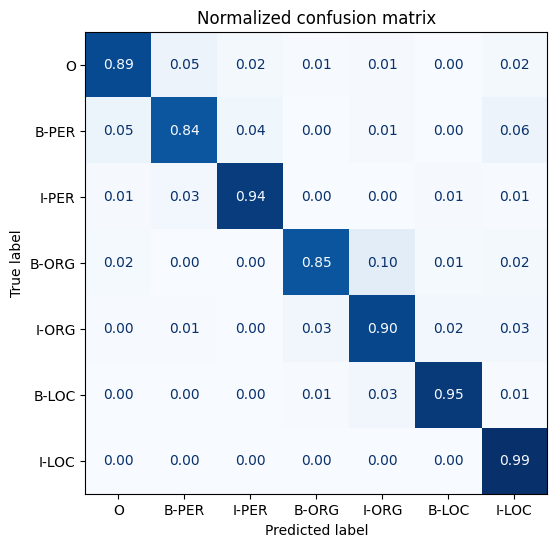

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()
plot_confusion_matrix(df_tokens["labels"], df_tokens["predicted_label"],
                      tags.names)

Display sample loss summed over all the sequences

In [ ]:
def get_samples(df):
    for _, row in df.iterrows():
        labels, preds, tokens, losses = [], [], [], []
        for i, mask in enumerate(row["attention_mask"]):
            if i not in {0, len(row["attention_mask"])}:
                labels.append(row["labels"][i])
                preds.append(row["predicted_label"][i])
                tokens.append(row["input_tokens"][i])
                losses.append(f"{row['loss'][i]:.2f}")
        df_tmp = pd.DataFrame({"tokens": tokens, "labels": labels,
                               "preds": preds, "losses": losses}).T
        yield df_tmp

df["total_loss"] = df["loss"].apply(sum)
df_tmp = df.sort_values(by="total_loss", ascending=False).head(3)

for sample in get_samples(df_tmp):
    display(sample)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
tokens,▁',▁'',▁Τ,Κ,▁'',▁',▁',▁'',▁T,▁'',▁',ri,▁'',▁',k,▁'',▁',ala,</s>
labels,O,O,O,IGN,O,O,B-LOC,I-LOC,I-LOC,I-LOC,I-LOC,IGN,I-LOC,I-LOC,IGN,I-LOC,I-LOC,IGN,IGN
preds,O,O,B-ORG,I-ORG,O,O,O,O,B-ORG,O,O,O,O,O,O,O,O,O,O
losses,0.00,0.00,3.75,0.00,0.00,0.00,10.51,10.15,8.06,7.29,7.51,0.00,7.56,8.05,0.00,7.87,8.05,0.00,0.00


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
tokens,▁'',8,.,▁Juli,▁'',▁:,▁Protest,camp,▁auf,▁dem,▁Gelände,▁der,▁Republika,n,ischen,▁Gar,de,</s>
labels,B-ORG,IGN,IGN,I-ORG,I-ORG,I-ORG,I-ORG,IGN,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,IGN,IGN,I-ORG,IGN,IGN
preds,O,O,O,O,O,O,O,O,O,O,O,O,B-ORG,I-ORG,I-ORG,I-ORG,I-ORG,O
losses,8.47,0.00,0.00,8.39,8.77,8.72,7.19,0.00,7.99,8.59,6.96,4.62,3.85,0.00,0.00,0.02,0.00,0.00


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
tokens,▁United,▁Nations,▁Multi,dimensional,▁Integra,ted,▁Stabil,ization,▁Mission,▁in,▁the,▁Central,▁African,▁Republic,</s>
labels,B-PER,I-PER,I-PER,IGN,I-PER,IGN,I-PER,IGN,I-PER,I-PER,I-PER,I-PER,I-PER,I-PER,IGN
preds,B-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG
losses,6.29,5.83,6.05,0.00,5.49,0.00,5.38,0.00,5.17,4.72,4.97,5.10,4.85,4.63,0.00


Parentheses loss

In [ ]:
df_tmp = df.loc[df["input_tokens"].apply(lambda x: u"\u2581(" in x)].head(2)
for sample in get_samples(df_tmp):
    display(sample)

,0,1,2,3,4,5
tokens,▁Ham,a,▁(,▁Unternehmen,▁),</s>
labels,B-ORG,IGN,I-ORG,I-ORG,I-ORG,IGN
preds,B-ORG,I-ORG,I-ORG,I-ORG,I-ORG,O
losses,0.01,0.00,0.01,0.01,0.01,0.00


,0,1,2,3,4,5,6,7
tokens,▁Kesk,kül,a,▁(,▁Mart,na,▁),</s>
labels,B-LOC,IGN,IGN,I-LOC,I-LOC,IGN,I-LOC,IGN
preds,B-LOC,I-LOC,I-LOC,I-LOC,I-LOC,I-LOC,I-LOC,I-LOC
losses,0.04,0.00,0.00,0.02,0.02,0.00,0.02,0.00


# Cross Lingual Transfer

Evaluate on other languages

In [ ]:
def get_f1_score(trainer, dataset):
  # print("Inside f1 score computation")
  preds = trainer.predict(dataset)
  # print(preds)
  return preds.metrics["test_f1"]

In [ ]:
panx_de_encoded["test"]

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 6290
})

In [ ]:
f1_scores = defaultdict(dict)
f1_scores["de"]["de"] = get_f1_score(trainer,
                          panx_de_encoded["test"])
print(f"F1-score of [de] model on [de] dataset: {f1_scores['de']['de']:.3f}")

Inside f1 score computation


ValueError: ignored

The above issue is an issue in the huggingface transformer function for token classification predict function.

https://github.com/huggingface/transformers/issues/14301

For now, we have find a way to calculate the f1 given the predictions

In [ ]:
test_set = panx_de_encoded["test"]
test_set = test_set.map(forward_pass_with_label, batched=True, batch_size=16)

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

You're using a XLMRobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


In [ ]:
df_test = test_set.to_pandas()
df_test.head()

,input_ids,attention_mask,labels,loss,predicted_label
0,"[0, 56530, 25216, 30121, 152385, 19229, 168309...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-100, 0, -100, -100, -100, -100, 5, 6, 6, -10...","[0.0, 0.00017486473, 0.0, 0.0, 0.0, 0.0, 0.059...","[6, 0, 0, 0, 0, 0, 5, 6, 6, 6, 6, 6, 6, 6, 6, ..."
1,"[0, 12717, 203266, 53, 27646, 7, 1367, 6524, 6...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-100, 0, 1, -100, 2, -100, 0, 3, -100, -100, ...","[0.0, 0.0001677134, 0.019386107, 0.0, 0.034949...","[0, 0, 1, 1, 2, 2, 0, 3, 3, 4, 4, 0, 0, 0, 0, ..."
2,"[0, 6, 69112, 4855, 194593, 42, 152, 137, 1139...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[-100, 0, -100, 1, -100, -100, 2, 2, -100, -10...","[0.0, 0.0002840354, 0.0, 3.1840525, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, ..."
3,"[0, 242, 5106, 3980, 152462, 6406, 5106, 242, 2]","[1, 1, 1, 1, 1, 1, 1, 1, 1]","[-100, 0, 0, 3, -100, 4, 0, 0, -100]","[0.0, 0.00013803483, 0.00016759422, 0.00366682...","[0, 0, 0, 3, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[0, 622, 26431, 43609, 2777, 147, 5106, 4180, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[-100, 0, 0, 0, 3, -100, 0, 0, 0, 0, 0, -100, ...","[0.0, 0.00013565097, 0.0023913379, 0.9779999, ...","[0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


Get the tags from the index, as the seqeval's classification report function expects list of list of strings

Remove the labels and predictions where label index is -100

In [ ]:
# Get the index2labels and many more alignments
df_test = id2tags(df_test)

In [ ]:
df_test.head()

,input_ids,attention_mask,labels,loss,predicted_label
0,"[0, 56530, 25216, 30121, 152385, 19229, 168309...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-100, 0, -100, -100, -100, -100, 5, 6, 6, -10...","[0.0, 0.00017486473, 0.0, 0.0, 0.0, 0.0, 0.059...","[6, 0, 0, 0, 0, 0, 5, 6, 6, 6, 6, 6, 6, 6, 6, ..."
1,"[0, 12717, 203266, 53, 27646, 7, 1367, 6524, 6...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-100, 0, 1, -100, 2, -100, 0, 3, -100, -100, ...","[0.0, 0.0001677134, 0.019386107, 0.0, 0.034949...","[0, 0, 1, 1, 2, 2, 0, 3, 3, 4, 4, 0, 0, 0, 0, ..."
2,"[0, 6, 69112, 4855, 194593, 42, 152, 137, 1139...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[-100, 0, -100, 1, -100, -100, 2, 2, -100, -10...","[0.0, 0.0002840354, 0.0, 3.1840525, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, ..."
3,"[0, 242, 5106, 3980, 152462, 6406, 5106, 242, 2]","[1, 1, 1, 1, 1, 1, 1, 1, 1]","[-100, 0, 0, 3, -100, 4, 0, 0, -100]","[0.0, 0.00013803483, 0.00016759422, 0.00366682...","[0, 0, 0, 3, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[0, 622, 26431, 43609, 2777, 147, 5106, 4180, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[-100, 0, 0, 0, 3, -100, 0, 0, 0, 0, 0, -100, ...","[0.0, 0.00013565097, 0.0023913379, 0.9779999, ...","[0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
def filter_ignore_tags(row):
  row["filtered_labels"] = []
  row["filtered_preds"] = []
  for seq_label,pred_label in zip(row["labels"], row["predicted_label"]):
    if seq_label == "IGN":
      continue
    row["filtered_labels"].append(seq_label)
    row["filtered_preds"].append(pred_label)
  return row

In [ ]:
df_tested = df_test.apply(filter_ignore_tags, axis=1)

In [ ]:
df_tested.head()

,input_ids,attention_mask,labels,loss,predicted_label,input_tokens,filtered_labels,filtered_preds
0,"[0, 56530, 25216, 30121, 152385, 19229, 168309...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[IGN, O, IGN, IGN, IGN, IGN, B-LOC, I-LOC, I-L...","[0.0, 0.00017486473, 0.0, 0.0, 0.0, 0.0, 0.059...","[I-LOC, O, O, O, O, O, B-LOC, I-LOC, I-LOC, I-...","[<s>, ▁WE, ITE, RL, EIT, UNG, ▁Bezirk, ▁La, ▁C...","[O, B-LOC, I-LOC, I-LOC]","[O, B-LOC, I-LOC, I-LOC]"
1,"[0, 12717, 203266, 53, 27646, 7, 1367, 6524, 6...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[IGN, O, B-PER, IGN, I-PER, IGN, O, B-ORG, IGN...","[0.0, 0.0001677134, 0.019386107, 0.0, 0.034949...","[O, O, B-PER, B-PER, I-PER, I-PER, O, B-ORG, B...","[<s>, ▁Auch, ▁Mudd, y, ▁Water, s, ▁oder, ▁Gra,...","[O, B-PER, I-PER, O, B-ORG, I-ORG, O, O, O, O,...","[O, B-PER, I-PER, O, B-ORG, I-ORG, O, O, O, O,..."
2,"[0, 6, 69112, 4855, 194593, 42, 152, 137, 1139...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[IGN, O, IGN, B-PER, IGN, IGN, I-PER, I-PER, I...","[0.0, 0.0002840354, 0.0, 3.1840525, 0.0, 0.0, ...","[O, O, O, O, O, O, O, O, B-ORG, O, O, O, O, O,...","[<s>, ▁, ==, ▁Vor, läufe, r, ▁:, ▁„, Log, o, g...","[O, B-PER, I-PER, I-PER, O]","[O, O, O, O, O]"
3,"[0, 242, 5106, 3980, 152462, 6406, 5106, 242, 2]","[1, 1, 1, 1, 1, 1, 1, 1, 1]","[IGN, O, O, B-ORG, IGN, I-ORG, O, O, IGN]","[0.0, 0.00013803483, 0.00016759422, 0.00366682...","[O, O, O, B-ORG, B-ORG, I-ORG, O, O, O]","[<s>, ▁', ▁'', ▁Car, diff, ▁City, ▁'', ▁', </s>]","[O, O, B-ORG, I-ORG, O, O]","[O, O, B-ORG, I-ORG, O, O]"
4,"[0, 622, 26431, 43609, 2777, 147, 5106, 4180, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[IGN, O, O, O, B-ORG, IGN, O, O, O, O, O, IGN,...","[0.0, 0.00013565097, 0.0023913379, 0.9779999, ...","[O, O, O, B-ORG, B-ORG, B-ORG, O, O, O, O, O, ...","[<s>, ▁Die, ▁erste, ▁Single, ▁Ro, ar, ▁'', ▁wu...","[O, O, O, B-ORG, O, O, O, O, O]","[O, O, B-ORG, B-ORG, O, O, O, O, O]"


In [ ]:
list_labels = df_tested.filtered_labels.values.tolist()
list_preds = df_tested.filtered_preds.values.tolist()

In [ ]:
cr = classification_report(list_labels, list_preds)

In [ ]:
from seqeval.metrics import f1_score as eval_f1

In [ ]:
eval_f1(list_labels, list_preds)

0.8672356299101339

In [ ]:
def custom_f1_score(dataset):
  test_set = dataset.map(forward_pass_with_label, batched=True, batch_size=16)
  df_test = test_set.to_pandas()
  df_test = id2tags(df_test)
  df_tested = df_test.apply(filter_ignore_tags, axis=1)
  list_labels = df_tested.filtered_labels.values.tolist()
  list_preds = df_tested.filtered_preds.values.tolist()
  print(classification_report(list_labels, list_preds))
  return eval_f1(list_labels, list_preds)

In [ ]:
f1_scores["de"]["de"] = custom_f1_score(panx_de_encoded["test"])
print(f"F1-score of [de] model on [de] dataset: {f1_scores['de']['de']:.3f}")

              precision    recall  f1-score   support

         LOC       0.87      0.89      0.88      3180
         ORG       0.79      0.79      0.79      2573
         PER       0.92      0.92      0.92      3071

   micro avg       0.87      0.87      0.87      8824
   macro avg       0.86      0.86      0.86      8824
weighted avg       0.87      0.87      0.87      8824



In [ ]:
text_fr = "Jeff Dean est informaticien chez Google en Californie"
tag_text(text_fr, tags, trainer.model, xlmr_tokenizer)

torch.Size([1, 14, 7])


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Tokens,<s>,▁Jeff,▁De,an,▁est,▁informatic,ien,▁chez,▁Google,▁en,▁Cali,for,nie,</s>
Tags,O,B-PER,I-PER,I-PER,O,O,O,O,B-ORG,O,B-LOC,B-LOC,I-LOC,O


In [ ]:
def evaluate_lang_performance(lang, trainer):
    panx_ds = encode_panx_dataset(panx_ch[lang])
    # TODO - trainer.predict function gives error
    return custom_f1_score(panx_ds["test"])

Performance on French for the model trained using German

In [ ]:
f1_scores["de"]["fr"] = evaluate_lang_performance("fr", trainer)
print(f"F1-score of [de] model on [fr] dataset: {f1_scores['de']['fr']:.3f}")

Map:   0%|          | 0/2290 [00:00<?, ? examples/s]

Map:   0%|          | 0/2290 [00:00<?, ? examples/s]

              precision    recall  f1-score   support

         LOC       0.75      0.71      0.73      1130
         ORG       0.61      0.67      0.64       885
         PER       0.72      0.76      0.74      1045

   micro avg       0.69      0.72      0.71      3060
   macro avg       0.69      0.71      0.70      3060
weighted avg       0.70      0.72      0.71      3060

F1-score of [de] model on [fr] dataset: 0.705


Performance on Italian for the model trained using German

In [ ]:
f1_scores["de"]["it"] = evaluate_lang_performance("it", trainer)
print(f"F1-score of [de] model on [it] dataset: {f1_scores['de']['it']:.3f}")

Map:   0%|          | 0/1680 [00:00<?, ? examples/s]

Map:   0%|          | 0/840 [00:00<?, ? examples/s]

Map:   0%|          | 0/840 [00:00<?, ? examples/s]

Map:   0%|          | 0/840 [00:00<?, ? examples/s]

              precision    recall  f1-score   support

         LOC       0.75      0.68      0.71       426
         ORG       0.55      0.64      0.59       346
         PER       0.64      0.80      0.71       362

   micro avg       0.65      0.71      0.68      1134
   macro avg       0.65      0.71      0.67      1134
weighted avg       0.66      0.71      0.68      1134

F1-score of [de] model on [it] dataset: 0.675


Performance on English for the model trained using German

In [ ]:
f1_scores["de"]["en"] = evaluate_lang_performance("en", trainer)
print(f"F1-score of [de] model on [en] dataset: {f1_scores['de']['en']:.3f}")

Map:   0%|          | 0/1180 [00:00<?, ? examples/s]

Map:   0%|          | 0/590 [00:00<?, ? examples/s]

Map:   0%|          | 0/590 [00:00<?, ? examples/s]

Map:   0%|          | 0/590 [00:00<?, ? examples/s]

              precision    recall  f1-score   support

         LOC       0.46      0.55      0.50       283
         ORG       0.55      0.66      0.60       276
         PER       0.64      0.69      0.67       264

   micro avg       0.55      0.63      0.59       823
   macro avg       0.55      0.63      0.59       823
weighted avg       0.55      0.63      0.59       823

F1-score of [de] model on [en] dataset: 0.586


## Significance of zero shot transfer

take a DatasetDict object corresponding to a monolingual corpus,

downsamples it by num_samples, and

fine-tunes XLM-R on that sample to return the metrics from the best epoch


In [ ]:
from transformers import Trainer

def train_on_subset(dataset, num_samples):
    train_ds = dataset["train"].shuffle(seed=42).select(range(num_samples))
    valid_ds = dataset["validation"]
    test_ds = dataset["test"]
    training_args.logging_steps = len(train_ds) // batch_size

    trainer = Trainer(model_init=model_init, args=training_args,
        data_collator=data_collator, compute_metrics=compute_metrics,
        train_dataset=train_ds, eval_dataset=valid_ds, tokenizer=xlmr_tokenizer)
    trainer.train()
    if training_args.push_to_hub:
        trainer.push_to_hub(commit_message="Training completed!")
    print("Training completed here")
    f1_score = get_f1_score(trainer, test_ds)
    # f1_score = custom_f1_score(test_ds)
    return pd.DataFrame.from_dict(
        {"num_samples": [len(train_ds)], "f1_score": [f1_score]})

In [ ]:
panx_fr_encoded = encode_panx_dataset(panx_ch["fr"])

Map:   0%|          | 0/4580 [00:00<?, ? examples/s]

In [ ]:
training_args.push_to_hub = False
metrics_df = train_on_subset(panx_fr_encoded, 250)
metrics_df


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,F1
1,1.797900,1.381488,0.103951
2,1.306200,1.135745,0.177569
3,1.085200,1.040954,0.181183


Training completed here


,num_samples,f1_score
0,250,0.16441


With 250 samples, fine tuning on French underperforms the zero-shot transfer from German

In [ ]:
# !pip list
# !pip install --force-reinstall --no-dependencies "scikit-learn==0.24.2"


In [ ]:
for num_samples in [500, 1000, 2000]:
    metrics_df = metrics_df.append(
        train_on_subset(panx_fr_encoded, num_samples), ignore_index=True)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,F1
1,1.492500,1.051082,0.185522
2,0.899700,0.704920,0.572459
3,0.587200,0.585941,0.618498


Training completed here


<ipython-input-157-95404e7c65ac>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,F1
1,1.210000,0.628003,0.579746
2,0.508500,0.413554,0.729393
3,0.322200,0.381819,0.765563


Training completed here


<ipython-input-157-95404e7c65ac>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,F1
1,0.793600,0.444528,0.702285
2,0.334100,0.359148,0.783166
3,0.221100,0.342364,0.812083


Training completed here


<ipython-input-157-95404e7c65ac>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss


OutOfMemoryError: ignored

**Plotting the F1-scores on the test set as a function of increasing training set size**

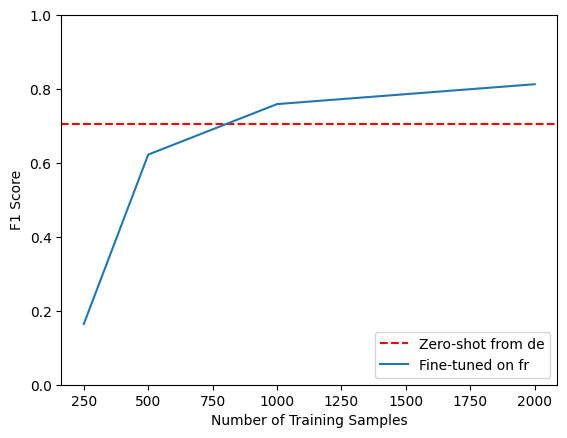

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.axhline(f1_scores["de"]["fr"], ls="--", color="r")
metrics_df.set_index("num_samples").plot(ax=ax)
plt.legend(["Zero-shot from de", "Fine-tuned on fr"], loc="lower right")
plt.ylim((0, 1))
plt.xlabel("Number of Training Samples")
plt.ylabel("F1 Score")
plt.show()

From the above graph, we can see zero-shot transfer from German remains competitive until about 750 samples after which, fine-tuning on French proves quite fruitful for the monolingual language model!

## Fine tuning on multiple langauges at once

German and French corpus together

In [ ]:
from datasets import concatenate_datasets

def concatenate_splits(corpora):
    multi_corpus = DatasetDict()
    for split in corpora[0].keys():
        multi_corpus[split] = concatenate_datasets(
            [corpus[split] for corpus in corpora]).shuffle(seed=42)
    return multi_corpus

In [ ]:
panx_fr_encoded = encode_panx_dataset(panx_ch["fr"])
panx_de_fr_encoded = concatenate_splits([panx_de_encoded, panx_fr_encoded])

In [ ]:
torch.cuda.empty_cache()

In [ ]:
training_args.logging_steps = len(panx_de_fr_encoded["train"]) // batch_size
training_args.push_to_hub = True
training_args.output_dir = "xlm-roberta-base-finetuned-panx-de-fr"

trainer = Trainer(model_init=model_init, args=training_args,
    data_collator=data_collator, compute_metrics=compute_metrics,
    tokenizer=xlmr_tokenizer, train_dataset=panx_de_fr_encoded["train"],
    eval_dataset=panx_de_fr_encoded["validation"])

trainer.train()
trainer.push_to_hub(commit_message="Training completed!")

/content/xlm-roberta-base-finetuned-panx-de-fr is already a clone of https://huggingface.co/pradeepiisc/xlm-roberta-base-finetuned-panx-de-fr. Make sure you pull the latest changes with `repo.git_pull()`.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,F1
1,0.285700,0.189940,0.826831
2,0.151500,0.162695,0.849896
3,0.096500,0.160231,0.860922


Upload file pytorch_model.bin:   0%|          | 1.00/1.03G [00:00<?, ?B/s]

Upload file training_args.bin:   0%|          | 1.00/3.56k [00:00<?, ?B/s]

To https://huggingface.co/pradeepiisc/xlm-roberta-base-finetuned-panx-de-fr
   9359ddd..4a600d4  main -> main

   9359ddd..4a600d4  main -> main

To https://huggingface.co/pradeepiisc/xlm-roberta-base-finetuned-panx-de-fr
   4a600d4..3a27af0  main -> main

   4a600d4..3a27af0  main -> main



'https://huggingface.co/pradeepiisc/xlm-roberta-base-finetuned-panx-de-fr/commit/4a600d4273689817dbee126277e376f2897d29b2'

In [ ]:
from transformers import pipeline

model_id = "xlm-roberta-base-finetuned-panx-de-fr"
trainer = pipeline("token-classification", model=model_id, device=device)

In [ ]:
langs

['de', 'fr', 'it', 'en']

In [ ]:
for lang in langs:
    f1 = evaluate_lang_performance(lang, trainer)
    print(f"F1-score of [de-fr] model on [{lang}] dataset: {f1:.3f}")

Loading cached processed dataset at C:\Users\WMYFHCK\.cache\huggingface\datasets\xtreme\PAN-X.de\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-dac1a660f71716e7.arrow
Loading cached processed dataset at C:\Users\WMYFHCK\.cache\huggingface\datasets\xtreme\PAN-X.de\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-9db1b270dcd79b93.arrow
Loading cached processed dataset at C:\Users\WMYFHCK\.cache\huggingface\datasets\xtreme\PAN-X.de\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-0f1410763b137627.arrow
Loading cached processed dataset at C:\Users\WMYFHCK\.cache\huggingface\datasets\xtreme\PAN-X.de\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-ab675826d33c840a.arrow


              precision    recall  f1-score   support

         LOC       0.86      0.89      0.88      3180
         ORG       0.80      0.78      0.79      2573
         PER       0.92      0.92      0.92      3071

   micro avg       0.86      0.87      0.87      8824
   macro avg       0.86      0.86      0.86      8824
weighted avg       0.86      0.87      0.87      8824

F1-score of [de-fr] model on [de] dataset: 0.867


Map:   0%|          | 0/4580 [00:00<?, ? examples/s]

Map:   0%|          | 0/2290 [00:00<?, ? examples/s]

Map:   0%|          | 0/2290 [00:00<?, ? examples/s]

Map:   0%|          | 0/2290 [00:00<?, ? examples/s]

              precision    recall  f1-score   support

         LOC       0.85      0.86      0.85      1130
         ORG       0.77      0.80      0.79       885
         PER       0.92      0.93      0.93      1045

   micro avg       0.85      0.87      0.86      3060
   macro avg       0.85      0.86      0.86      3060
weighted avg       0.85      0.87      0.86      3060

F1-score of [de-fr] model on [fr] dataset: 0.859


Map:   0%|          | 0/1680 [00:00<?, ? examples/s]

Map:   0%|          | 0/840 [00:00<?, ? examples/s]

Map:   0%|          | 0/840 [00:00<?, ? examples/s]

Map:   0%|          | 0/840 [00:00<?, ? examples/s]

              precision    recall  f1-score   support

         LOC       0.77      0.76      0.77       426
         ORG       0.69      0.74      0.72       346
         PER       0.89      0.93      0.91       362

   micro avg       0.78      0.81      0.80      1134
   macro avg       0.78      0.81      0.80      1134
weighted avg       0.79      0.81      0.80      1134

F1-score of [de-fr] model on [it] dataset: 0.796


Map:   0%|          | 0/1180 [00:00<?, ? examples/s]

Map:   0%|          | 0/590 [00:00<?, ? examples/s]

Map:   0%|          | 0/590 [00:00<?, ? examples/s]

Map:   0%|          | 0/590 [00:00<?, ? examples/s]

              precision    recall  f1-score   support

         LOC       0.52      0.63      0.57       283
         ORG       0.62      0.66      0.64       276
         PER       0.83      0.89      0.86       264

   micro avg       0.65      0.72      0.68       823
   macro avg       0.66      0.73      0.69       823
weighted avg       0.65      0.72      0.69       823

F1-score of [de-fr] model on [en] dataset: 0.683


Performance on french and even other languages improved by training on one more language

## Get all the functions used for training/tuning in one cell

In [3]:
import torch
import pandas as pd
import torch.nn as nn
from transformers import XLMRobertaConfig
from transformers.modeling_outputs import TokenClassifierOutput
from transformers.models.roberta.modeling_roberta import RobertaModel
from transformers.models.roberta.modeling_roberta import RobertaPreTrainedModel
from collections import defaultdict
from datasets import DatasetDict
from datasets import load_dataset
from transformers import AutoTokenizer


def get_multilingual_dataset(langs, fracs):
    # Return a DatasetDict by default
    panx_ch = defaultdict(DatasetDict)

    for lang, frac in zip(langs, fracs):
        # Load monolingual corpus
        ds = load_dataset("xtreme", name=f"PAN-X.{lang}")
        # Shuffle and downsample each split according to spoken proportion
        for split in ds:
            panx_ch[lang][split] = (
                ds[split]
                .shuffle(seed=0)
                .select(range(int(frac * ds[split].num_rows))))
    return panx_ch


class XLMRobertaForTokenClassification(RobertaPreTrainedModel):
    """
    RobertaPreTrainedModel provides the pretrained weights
    useful for initialising the custom model, where as,

    RobertaModel used in the constructor provides the hidden states weights
    by loading the model body
    """
    config_class = XLMRobertaConfig

    def __init__(self, config):
        super().__init__(config)
        self.num_labels = config.num_labels
        # Load model body
        self.roberta = RobertaModel(config, add_pooling_layer=False)
        # Set up token classification head
        self.dropout = nn.Dropout(config.hidden_dropout_prob)
        self.classifier = nn.Linear(config.hidden_size, config.num_labels)
        # Load and initialize weights,
        # init_weights is a method in the base class RobertaPreTrainedModel
        self.init_weights()

    def forward(self, input_ids=None, attention_mask=None, token_type_ids=None,
                labels=None, **kwargs):
        # Use model body to get encoder representations
        outputs = self.roberta(input_ids, attention_mask=attention_mask,
                               token_type_ids=token_type_ids, **kwargs)
        # Apply classifier to encoder representation
        sequence_output = self.dropout(outputs[0])
        logits = self.classifier(sequence_output)
        # Calculate losses
        loss = None
        if labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))
        # Return model output object
        return TokenClassifierOutput(loss=loss, logits=logits,
                                     hidden_states=outputs.hidden_states,
                                     attentions=outputs.attentions)

def tag_text(text, tags, model, tokenizer):
    print("Inside tag_text function")
    # Get tokens with special characters
    tokens = tokenizer(text).tokens()
    # Encode the sequence into IDs
    input_ids = xlmr_tokenizer(text, return_tensors="pt").input_ids.to(device)
    # Get predictions as distribution over 7 possible classes
    outputs = model(input_ids)[0]
    # Take argmax to get most likely class per token
    print(outputs.shape)
    predictions = torch.argmax(outputs, dim=2)
    # Convert to DataFrame
    preds = [tags.names[p] for p in predictions[0].cpu().numpy()]
    return pd.DataFrame([tokens, preds], index=["Tokens", "Tags"])

def tokenize_and_align_labels(examples):
    tokenized_inputs = xlmr_tokenizer(examples["tokens"], truncation=True,
                                      is_split_into_words=True)
    labels = []
    for idx, label in enumerate(examples["ner_tags"]):
        word_ids = tokenized_inputs.word_ids(batch_index=idx)
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:
            if word_idx is None or word_idx == previous_word_idx:
                label_ids.append(-100)
            else:
                label_ids.append(label[word_idx])
            previous_word_idx = word_idx
        labels.append(label_ids)
    tokenized_inputs["labels"] = labels
    return tokenized_inputs

def encode_panx_dataset(corpus):
    return corpus.map(tokenize_and_align_labels, batched=True,
                      remove_columns=['langs', 'ner_tags', 'tokens'])

import numpy as np
from seqeval.metrics import classification_report
from seqeval.metrics import f1_score
from huggingface_hub import notebook_login
from transformers import TrainingArguments
from transformers import Trainer
from transformers import AutoConfig
from transformers import DataCollatorForTokenClassification
from torch.nn.functional import cross_entropy
from datasets import concatenate_datasets


def align_predictions(predictions, label_ids):
    preds = np.argmax(predictions, axis=2)
    batch_size, seq_len = preds.shape
    labels_list, preds_list = [], []

    for batch_idx in range(batch_size):
        example_labels, example_preds = [], []
        for seq_idx in range(seq_len):
            # Ignore label IDs = -100
            if label_ids[batch_idx, seq_idx] != -100:
                example_labels.append(index2tag[label_ids[batch_idx][seq_idx]])
                example_preds.append(index2tag[preds[batch_idx][seq_idx]])

        labels_list.append(example_labels)
        preds_list.append(example_preds)

    return preds_list, labels_list

def compute_metrics(eval_pred):
    y_pred, y_true = align_predictions(eval_pred.predictions,
                                       eval_pred.label_ids)
    return {"f1": f1_score(y_true, y_pred)}

def get_xlmr_config(xlmr_model_name, tags, index2tag, tag2index):
    xlmr_config = AutoConfig.from_pretrained(xlmr_model_name,
                                             num_labels=tags.num_classes,
                                             id2label=index2tag, label2id=tag2index)
    return xlmr_config

def model_init():
    return (XLMRobertaForTokenClassification
            .from_pretrained(xlmr_model_name, config=xlmr_config)
            .to(device))


def forward_pass_with_label(batch):
    print("Inside forward_pass_with_label function")
    # Convert dict of lists to list of dicts suitable for data collator
    features = [dict(zip(batch, t)) for t in zip(*batch.values())]
    # Pad inputs and labels and put all tensors on device
    batch = data_collator(features)
    input_ids = batch["input_ids"].to(device)
    attention_mask = batch["attention_mask"].to(device)
    labels = batch["labels"].to(device)
    with torch.no_grad():
        # Pass data through model
        output = trainer.model(input_ids, attention_mask)
        # logit.size: [batch_size, sequence_length, classes]
        # Predict class with largest logit value on classes axis
        predicted_label = torch.argmax(output.logits, axis=-1).cpu().numpy()
    # Calculate loss per token after flattening batch dimension with view
    loss = cross_entropy(output.logits.view(-1, 7),
                         labels.view(-1), reduction="none")
    # Unflatten batch dimension and convert to numpy array
    loss = loss.view(len(input_ids), -1).cpu().numpy()

    return {"loss":loss, "predicted_label": predicted_label}

def id2tags(df):
    index2tag[-100] = "IGN"
    df["input_tokens"] = df["input_ids"].apply(
      lambda x: xlmr_tokenizer.convert_ids_to_tokens(x))
    df["predicted_label"] = df["predicted_label"].apply(
      lambda x: [index2tag[i] for i in x])
    df["labels"] = df["labels"].apply(
      lambda x: [index2tag[i] for i in x])
    df['loss'] = df.apply(
      lambda x: x['loss'][:len(x['input_ids'])], axis=1)
    df['predicted_label'] = df.apply(
      lambda x: x['predicted_label'][:len(x['input_ids'])], axis=1)
    return df

def filter_ignore_tags(row):
    row["filtered_labels"] = []
    row["filtered_preds"] = []
    for seq_label,pred_label in zip(row["labels"], row["predicted_label"]):
        if seq_label == "IGN":
          continue
        row["filtered_labels"].append(seq_label)
        row["filtered_preds"].append(pred_label)
    return row

def custom_f1_score(dataset):
    test_set = dataset.map(forward_pass_with_label, batched=True, batch_size=16)
    df_test = test_set.to_pandas()
    df_test = id2tags(df_test)
    df_tested = df_test.apply(filter_ignore_tags, axis=1)
    list_labels = df_tested.filtered_labels.values.tolist()
    list_preds = df_tested.filtered_preds.values.tolist()
    print(classification_report(list_labels, list_preds))
    return eval_f1(list_labels, list_preds)

def evaluate_lang_performance(lang, trainer):
    panx_ds = encode_panx_dataset(panx_ch[lang])
    # TODO - trainer.predict function gives error
    return custom_f1_score(panx_ds["test"])

def get_f1_score(trainer, dataset):
  # print("Inside f1 score computation")
  preds = trainer.predict(dataset)
  # print(preds)
  return preds.metrics["test_f1"]

def train_on_subset(dataset, num_samples,xlmr_tokenizer, training_args, batch_size):
    train_ds = dataset["train"].shuffle(seed=42).select(range(num_samples))
    valid_ds = dataset["validation"]
    test_ds = dataset["test"]
    training_args.logging_steps = len(train_ds) // batch_size

    data_collator = DataCollatorForTokenClassification(xlmr_tokenizer)

    trainer = Trainer(model_init=model_init, args=training_args,
        data_collator=data_collator, compute_metrics=compute_metrics,
        train_dataset=train_ds, eval_dataset=valid_ds, tokenizer=xlmr_tokenizer)

    trainer.train()
    if training_args.push_to_hub:
        trainer.push_to_hub(commit_message="Training completed!")
    print("Training completed here")
    f1_score = get_f1_score(trainer, test_ds)
    # f1_score = custom_f1_score(test_ds)
    return pd.DataFrame.from_dict(
        {"num_samples": [len(train_ds)], "f1_score": [f1_score]})

def concatenate_splits(corpora):
    multi_corpus = DatasetDict()
    for split in corpora[0].keys():
        multi_corpus[split] = concatenate_datasets(
            [corpus[split] for corpus in corpora]).shuffle(seed=42)
    return multi_corpus

def get_training_args(epochs, batch_size, output_dir_name):
    num_epochs = epochs
    batch_size = batch_size
    logging_steps = len(panx_de_encoded["train"]) // batch_size
    model_name = output_dir_name
    training_args = TrainingArguments(
        output_dir=model_name, log_level="error", num_train_epochs=num_epochs,
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=batch_size, evaluation_strategy="epoch",
        save_steps=1e6, weight_decay=0.01, disable_tqdm=False,
        logging_steps=logging_steps, push_to_hub=True)
    return training_args

#### Get all languages by repsective fraction

In [4]:
langs = ["de", "fr", "it", "en"]
fracs = [0.629, 0.229, 0.084, 0.059]
panx_ch = get_multilingual_dataset(langs, fracs)


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

#### Get XLMR tokenizer

In [5]:
xlmr_model_name = "xlm-roberta-base"
xlmr_tokenizer = AutoTokenizer.from_pretrained(xlmr_model_name)

#### Get german encoded

In [6]:
panx_de_encoded = encode_panx_dataset(panx_ch["de"])

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device="cpu"
device

device(type='cuda')

In [8]:
tags = panx_ch["de"]["train"].features["ner_tags"].feature
index2tag = {idx: tag for idx, tag in enumerate(tags.names)}
tag2index = {tag: idx for idx, tag in enumerate(tags.names)}

xlmr_config = get_xlmr_config(xlmr_model_name, tags, index2tag, tag2index)

In [9]:
# !pip install accelerate -U

In [10]:
num_epochs=3
batch_size=24
training_args = get_training_args(epochs=num_epochs, batch_size=batch_size, output_dir_name= "xlmr_model_name-finetuned-panx-de")

In [11]:
notebook_login()

#### Compare the performance of fine-tuning on each language separately against multilingual learning on all the corpora

In [26]:
# torch.cuda.empty_cache()
# IF f1_scores is not defined then use the following results achieved earlier at the top
# f1_scores = defaultdict(dict)
# f1_scores["de"]["de"] = 0.87
# f1_scores["de"]["fr"] = 0.705
# f1_scores["de"]["it"] = 0.675
# f1_scores["de"]["en"] = 0.586


In [17]:
corpora = [panx_de_encoded]
print("Encoding each language one by one")
# Exclude German from iteration
for lang in langs[1:]:
    print("Language {} starting to encode".format(lang))
    # using the previously defined training args and changing the output dir

    training_args.output_dir = f"xlm-roberta-base-finetuned-panx-{lang}"
    # Fine-tune on monolingual corpus
    ds_encoded = encode_panx_dataset(panx_ch[lang])
    print("Language {} encoded".format(lang))
    metrics = train_on_subset(ds_encoded, ds_encoded["train"].num_rows, xlmr_tokenizer, training_args, batch_size)
    # Collect F1-scores in common dict
    f1_scores[lang][lang] = metrics["f1_score"][0]
    # Add monolingual corpus to list of corpora to concatenate
    corpora.append(ds_encoded)

Language it starting to encode


Map:   0%|          | 0/1680 [00:00<?, ? examples/s]

Map:   0%|          | 0/840 [00:00<?, ? examples/s]

Map:   0%|          | 0/840 [00:00<?, ? examples/s]

Language it encoded


Cloning https://huggingface.co/pradeepiisc/xlm-roberta-base-finetuned-panx-it into local empty directory.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,F1
1,0.699700,0.325763,0.762252
2,0.288400,0.266035,0.803738
3,0.177500,0.237610,0.818885


Adding files tracked by Git LFS: ['tokenizer.json']. This may take a bit of time if the files are large.


Upload file pytorch_model.bin:   0%|          | 1.00/1.03G [00:00<?, ?B/s]

Upload file training_args.bin:   0%|          | 1.00/3.56k [00:00<?, ?B/s]

Upload file tokenizer.json:   0%|          | 1.00/16.3M [00:00<?, ?B/s]

To https://huggingface.co/pradeepiisc/xlm-roberta-base-finetuned-panx-it
   c0129d5..27f5785  main -> main

   c0129d5..27f5785  main -> main

To https://huggingface.co/pradeepiisc/xlm-roberta-base-finetuned-panx-it
   27f5785..606f911  main -> main

   27f5785..606f911  main -> main



Training completed here


Language en starting to encode


Map:   0%|          | 0/1180 [00:00<?, ? examples/s]

Map:   0%|          | 0/590 [00:00<?, ? examples/s]

Map:   0%|          | 0/590 [00:00<?, ? examples/s]

Language en encoded


Cloning https://huggingface.co/pradeepiisc/xlm-roberta-base-finetuned-panx-en into local empty directory.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,F1
1,1.031100,0.514873,0.582347
2,0.501700,0.399844,0.689771
3,0.373700,0.381965,0.690848


Adding files tracked by Git LFS: ['tokenizer.json']. This may take a bit of time if the files are large.


Upload file pytorch_model.bin:   0%|          | 1.00/1.03G [00:00<?, ?B/s]

Upload file tokenizer.json:   0%|          | 1.00/16.3M [00:00<?, ?B/s]

Upload file training_args.bin:   0%|          | 1.00/3.56k [00:00<?, ?B/s]

To https://huggingface.co/pradeepiisc/xlm-roberta-base-finetuned-panx-en
   b3c0d1e..96bcf07  main -> main

   b3c0d1e..96bcf07  main -> main

To https://huggingface.co/pradeepiisc/xlm-roberta-base-finetuned-panx-en
   96bcf07..1200a3b  main -> main

   96bcf07..1200a3b  main -> main



Training completed here


### Multilingual corpus of all 4 langs

In [19]:
corpora_encoded = concatenate_splits(corpora)

In [20]:
training_args.logging_steps = len(corpora_encoded["train"]) // batch_size
training_args.output_dir = "xlm-roberta-base-finetuned-panx-all"

In [21]:
data_collator = DataCollatorForTokenClassification(xlmr_tokenizer)

trainer = Trainer(model_init=model_init, args=training_args,
                  data_collator=data_collator, compute_metrics=compute_metrics,
                  tokenizer=xlmr_tokenizer, train_dataset=corpora_encoded["train"],
                  eval_dataset=corpora_encoded["validation"])

trainer.train()
trainer.push_to_hub(commit_message="Training completed!")

Cloning https://huggingface.co/pradeepiisc/xlm-roberta-base-finetuned-panx-all into local empty directory.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,F1
1,0.296700,0.190038,0.821896
2,0.157600,0.168474,0.847043
3,0.101400,0.175101,0.854870


Adding files tracked by Git LFS: ['tokenizer.json']. This may take a bit of time if the files are large.


Upload file pytorch_model.bin:   0%|          | 1.00/1.03G [00:00<?, ?B/s]

Upload file training_args.bin:   0%|          | 1.00/3.56k [00:00<?, ?B/s]

Upload file tokenizer.json:   0%|          | 1.00/16.3M [00:00<?, ?B/s]

To https://huggingface.co/pradeepiisc/xlm-roberta-base-finetuned-panx-all
   1ca086c..e6d9b6d  main -> main

   1ca086c..e6d9b6d  main -> main

To https://huggingface.co/pradeepiisc/xlm-roberta-base-finetuned-panx-all
   e6d9b6d..0ff3f4d  main -> main

   e6d9b6d..0ff3f4d  main -> main



'https://huggingface.co/pradeepiisc/xlm-roberta-base-finetuned-panx-all/commit/e6d9b6d839a0185ef747eb38903bb898ca0bba37'

Test the multilingual trainer on single language

In [23]:
for idx, lang in enumerate(langs):
    f1_scores["all"][lang] = get_f1_score(trainer, corpora[idx]["test"])

In [30]:
f1_scores

defaultdict(dict,
            {'de': {'de': 0.87, 'fr': 0.705, 'it': 0.675, 'en': 0.586},
             'fr': {'fr': 0.8414634146341463},
             'it': {'it': 0.8160275743214132},
             'en': {'en': 0.7014051522248244},
             'all': {'de': 0.867909604519774,
              'fr': 0.873134328358209,
              'it': 0.8780061215566244,
              'en': 0.7637231503579952}})

Get all the scores in a single dataframe for analysis

In [31]:

scores_data = {"de": f1_scores["de"],
               "each": {lang: f1_scores[lang][lang] for lang in langs},
               "all": f1_scores["all"]}
f1_scores_df = pd.DataFrame(scores_data).T.round(4)

f1_scores_df.rename_axis(index="Fine-tune on", columns="Evaluated on",
                         inplace=True)
f1_scores_df


Evaluated on,de,fr,it,en
Fine-tune on,,,,
de,0.8700,0.7050,0.675,0.5860
each,0.8700,0.8415,0.816,0.7014
all,0.8679,0.8731,0.878,0.7637


# Conclusion



1.   Multilingual learning can provide significant gains in performance, especially if the low-resource languages for cross-lingual transfer belong to similar language families. In our experiments we can see that German, French, and Italian achieve similar performance in the all category, suggesting that **these languages are more similar to each other than to English**.
2.   As a general strategy, it is a good idea to focus attention on cross-lingual transfer within language families, especially when dealing with different scripts like Japanese.

